In [1]:
import numpy as np
import pandas as pd
import random
%matplotlib inline

In [2]:
# Data Generation
# Warning! Boilerplate code
n = 100
x = np.arange(n)
y_stationary = np.random.normal(0, 1, n)

y_nonstationary = [random.random() + (x * .01) for x in range(100)]

df = pd.DataFrame({
    "Stationary": y_stationary,
    "Nonstationary": y_nonstationary
})

<AxesSubplot:>

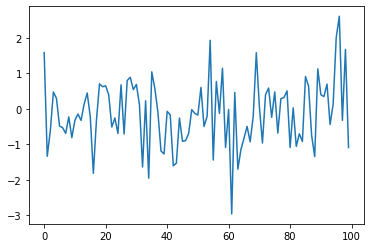

In [3]:
df.Stationary.plot()

<AxesSubplot:>

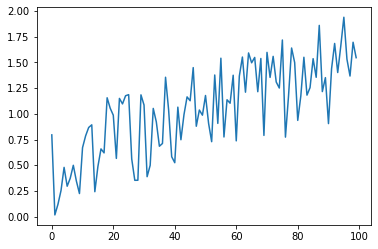

In [4]:
df.Nonstationary.plot()

In [5]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(df.Stationary)

(-5.851632786915424,
 3.578004801660628e-07,
 1,
 98,
 {'1%': -3.4989097606014496,
  '5%': -2.891516256916761,
  '10%': -2.5827604414827157},
 243.22069534665454)

In [6]:
adfuller(df.Nonstationary)

(-1.570937763357245,
 0.49817391696019936,
 6,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 44.357422956714146)

# Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [7]:
# Convert to stationary data by taking the `pct_change` of the non-stationary data.
df['Returns'] = df.Nonstationary.pct_change()

In [8]:
# Drop the NaNs created by the pct_change function
df = df.dropna()

<AxesSubplot:>

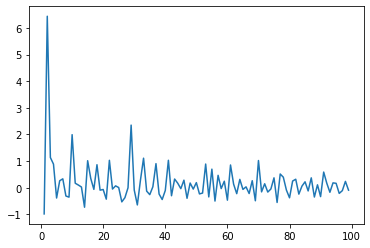

In [9]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df.Returns.plot()

### Technique 2: Applying a Diff

In [10]:
# Subtract the upward trend for the non-stationary data using the `diff()` function
df['Diff'] = df.Nonstationary.diff()

In [11]:
# Drop the NaNs created from the diff function
df = df.dropna()

<AxesSubplot:>

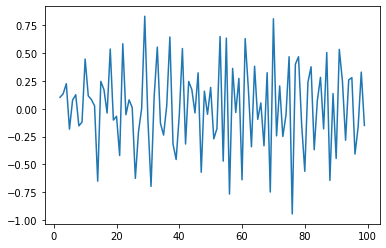

In [12]:
# Plot the 
df.Diff.plot()

In [13]:
adfuller(df.Diff)

(-7.60456992287623,
 2.340725520279593e-11,
 5,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 40.98580807406674)

In [14]:
adfuller(df.Returns)

(-10.517098440428864,
 9.89919452616114e-19,
 2,
 95,
 {'1%': -3.5011373281819504,
  '5%': -2.8924800524857854,
  '10%': -2.5832749307479226},
 97.67669111873755)